In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

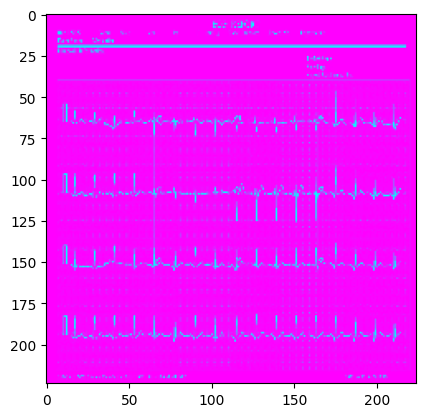

In [ ]:
def load_and_preprocess_image(image_path):

    image = cv2.imread(image_path)

    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    resized_image = cv2.resize(gray_image, (224, 224))

    normalized_image = resized_image / 255.0

    expanded_image = np.expand_dims(normalized_image, axis=-1)
    expanded_image = np.expand_dims(expanded_image, axis=0)
    return expanded_image

image_path = '/content/drive/MyDrive/ECG Report Reader/ecg1.jpg'

processed_image = load_and_preprocess_image(image_path)

plt.imshow(processed_image[0, :, :, 0], cmap='cool')
plt.show()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
def create_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

input_shape = (224, 224, 1)
model = create_model(input_shape)

In [ ]:
model.save('ecg_classifier_model.h5')


In [ ]:
from tensorflow.keras.models import load_model

def classify_ecg(image_path, model_path='ecg_classifier_model.h5'):
    model = load_model(model_path)
    processed_image = load_and_preprocess_image(image_path)
    prediction = model.predict(processed_image)
    class_names = ['Normal Heart', 'Abnormal Heart', 'Highly Emergency Heart']
    predicted_class = class_names[np.argmax(prediction)]
    return predicted_class

result = classify_ecg(image_path)
print(f'The ECG classification result is: {result}')



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
The ECG classification result is: Abnormal Heart
